In [1]:
import pandas as pd
import numpy as np
import time
from copy import deepcopy

from sklearn.base import BaseEstimator
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

from scipy import sparse

import pickle

from IPython.display import display

import matplotlib
import matplotlib.pyplot as plt

import seaborn as sns
pd.set_option('display.width', 15000)
pd.set_option('display.max_columns', 100)
sns.set_style("whitegrid", {'axes.grid' : False})
sns.set_context('poster')
%matplotlib inline

In [2]:
from surprise import Dataset, Reader
from surprise import NormalPredictor, BaselineOnly, SVD, SVDpp, NMF, \
SlopeOne, CoClustering, KNNBasic, KNNWithMeans, KNNBaseline

In [3]:
from recommender import plot_cm, print_results, IO
from recommender import ModeClassifier, BaselineMean, BaselineRegression, ALS1, ALS2, RS_surprise

In [4]:
%%time
# Load data

fig_dir = 'figs/modeling/Las_Vegas/'

data_dir = 'data/Las_Vegas/'
dfb = pd.read_pickle(data_dir + 'business.pkl')
dfr = pd.read_pickle(data_dir + 'review.pkl')
dfu = pd.read_pickle(data_dir + 'user.pkl')
datar = pd.read_pickle(data_dir + 'data_review.pkl')

Wall time: 36 ms


In [5]:
print(dfb.shape)
print(dfu.shape)
print(datar.shape)
datar.head()

(878, 93)
(8451, 22)
(20571, 3)


,user_id,business_id,stars
0,1305,44,4
1,1306,44,1
2,1307,44,1
3,1308,44,1
4,1309,44,1


In [6]:
# Split the dataset into a training set a test set

X_train, X_test, y_train, y_test = train_test_split(datar[['user_id', 'business_id']].values, datar['stars'].values, \
                                                   test_size=0.4, random_state=0)

In [7]:
models = [ModeClassifier(), RS_surprise(NormalPredictor()), BaselineMean(), BaselineRegression(), \
          RS_surprise(BaselineOnly()), RS_surprise(KNNBasic()), RS_surprise(KNNWithMeans()), RS_surprise(KNNBaseline()), \
          ALS1(), ALS2(), RS_surprise(SVD()), RS_surprise(SVDpp()), RS_surprise(NMF()), RS_surprise(SlopeOne()), \
          RS_surprise(CoClustering())]
model_names = ['Mode estimator', 'Normal predictor*', 'Baseline (mean)', 'Baseline (regression)', \
              'Baseline (ALS)*', 'KNN (basic)*', 'KNN (with means)*', 'KNN (baseline)*', \
              'SVD-ALS1', 'SVD-ALS2', 'SVD-SGD*', 'SVD++-SGD*', 'NMF-SGD*', 'Slope one*', 'Co-clustering*']
fignames = [fig_dir + str(i) + 'cm.png' for i in range(len(models))]

In [8]:
%%time

estimators = []
is_successful = []

for i, model in enumerate(models):
    try:
        model.fit(X_train, y_train)
        estimators.append(model)
        IO(data_dir + 'results/estimators.pkl').to_pickle(estimators)
        print(model_names[i] + ' successful.')
        is_successful.append(True)
    except:
        print(model_names[i] + ' failed.')
        is_successful.append(False)
        
IO(data_dir + 'results/is_successful.pkl').to_pickle(is_successful)

Mode estimator successful.
Normal predictor* successful.
Baseline (mean) successful.
Baseline (regression) successful.
Estimating biases using als...
Baseline (ALS)* successful.
Computing the msd similarity matrix...
Done computing similarity matrix.
KNN (basic)* successful.
Computing the msd similarity matrix...
Done computing similarity matrix.
KNN (with means)* successful.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
KNN (baseline)* successful.
SVD-ALS1 successful.
SVD-ALS2 successful.
SVD-SGD* successful.
SVD++-SGD* successful.
NMF-SGD* successful.
Slope one* successful.
Co-clustering* successful.
Wall time: 1min 59s


Mode estimator
Fitting time: 0.0010001659393310547 s.
RMSE on training set: 1.9994935349658218.
RMSE on test set: 2.024278450367606.
r2 on training set: -0.9500783822620691.
r2 on test set: -0.9490945580086452.
Classification accuracy on training set: 0.37433155080213903.
Classification accuracy on test set: 0.3736784542471746.


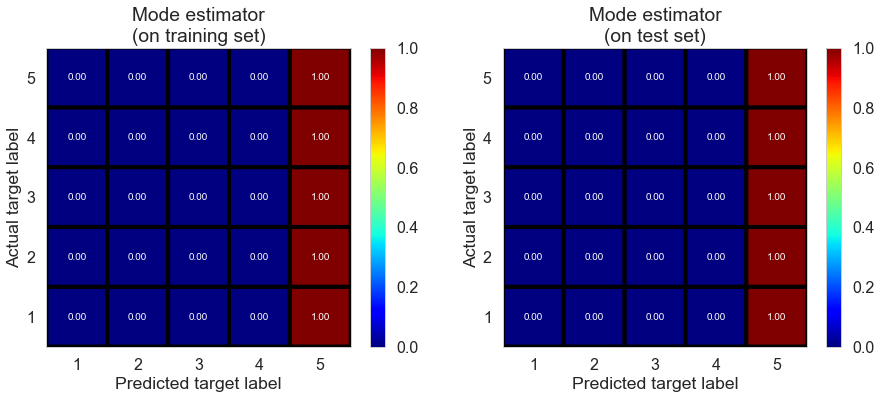


Normal predictor*
Fitting time: 0.19340777397155762 s.
RMSE on training set: 1.8825362996868045.
RMSE on test set: 1.8997786727103125.
r2 on training set: -0.702695119690234.
r2 on test set: -0.6664812394697497.
Classification accuracy on training set: 0.2307567655161238.
Classification accuracy on test set: 0.21873860736419978.


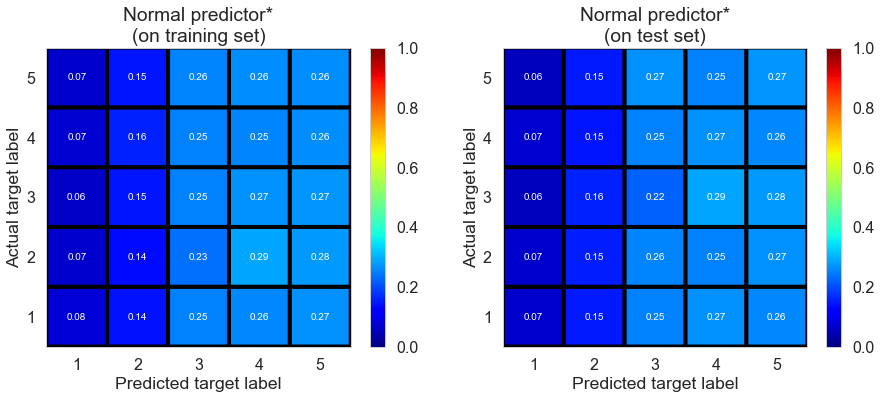


Baseline (mean)
Fitting time: 0.08500051498413086 s.
RMSE on training set: 0.9484578401066219.
RMSE on test set: 1.4744357496048999.
r2 on training set: 0.561218689319536.
r2 on test set: -0.03405612171238159.
Classification accuracy on training set: 0.5810241451952682.
Classification accuracy on test set: 0.32361161745048.


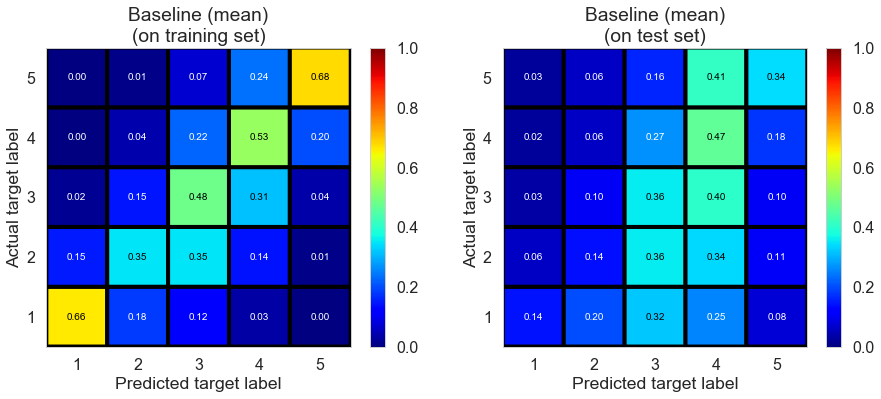


Baseline (regression)
Fitting time: 0.04680013656616211 s.
RMSE on training set: 0.8532170755755689.
RMSE on test set: 1.3375503949625676.
r2 on training set: 0.6449159731577896.
r2 on test set: 0.14903301090614463.
Classification accuracy on training set: 0.44109544644304005.
Classification accuracy on test set: 0.2819297606027464.


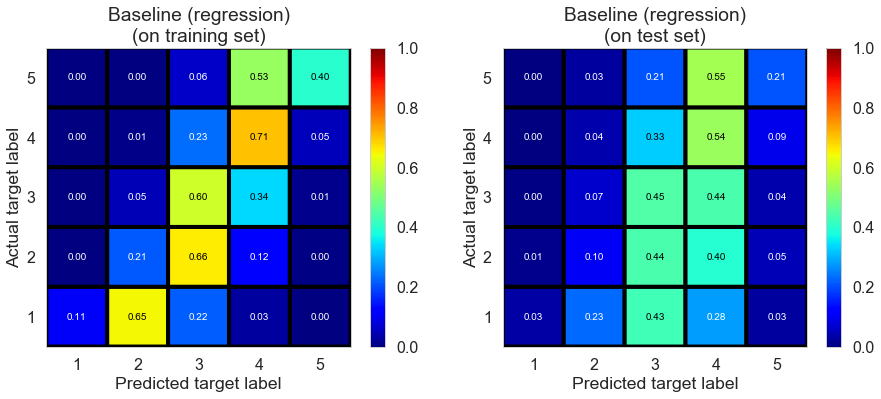


Baseline (ALS)*
Fitting time: 0.1336069107055664 s.
RMSE on training set: 1.1981494776589925.
RMSE on test set: 1.3246453630156922.
r2 on training set: 0.29978071939622475.
r2 on test set: 0.16537449427758555.
Classification accuracy on training set: 0.2545778642035327.
Classification accuracy on test set: 0.23854660347551343.


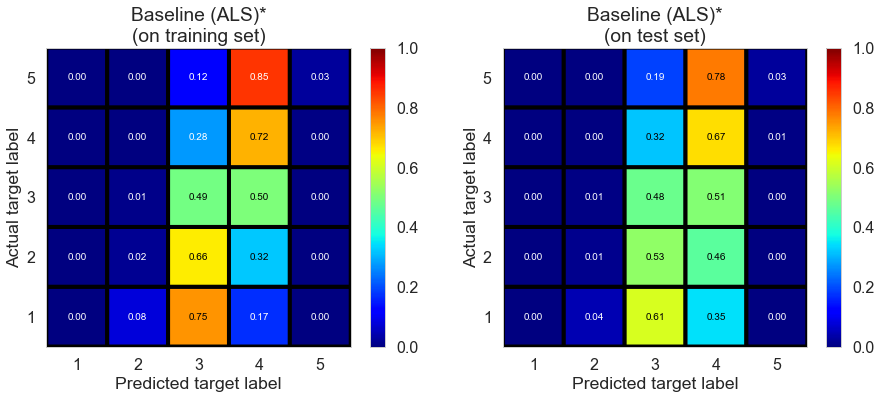


KNN (basic)*
Fitting time: 1.9450290203094482 s.
RMSE on training set: 0.4328177378241623.
RMSE on test set: 1.4723466037118087.
r2 on training set: 0.9086261001530872.
r2 on test set: -0.03112786440849269.
Classification accuracy on training set: 0.790633608815427.
Classification accuracy on test set: 0.25215700571150806.


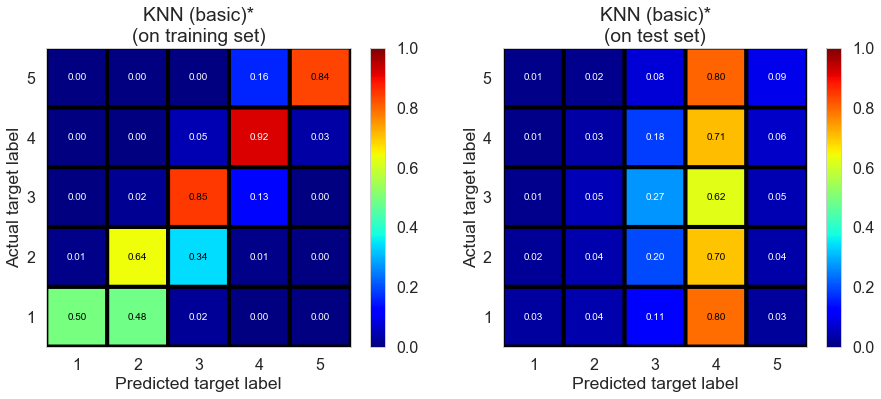


KNN (with means)*
Fitting time: 2.234692335128784 s.
RMSE on training set: 0.5898426296781006.
RMSE on test set: 1.5383720220046617.
r2 on training set: 0.8302990108916437.
r2 on test set: -0.12568052109139938.
Classification accuracy on training set: 0.6912980068060282.
Classification accuracy on test set: 0.2807145461173897.


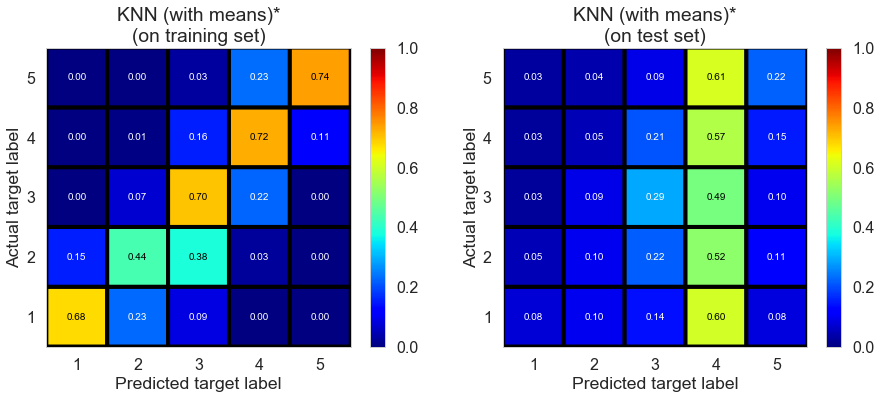


KNN (baseline)*
Fitting time: 2.5684220790863037 s.
RMSE on training set: 0.4174633886450182.
RMSE on test set: 1.3828548304542667.
r2 on training set: 0.9149941435078562.
r2 on test set: 0.09041018779942722.
Classification accuracy on training set: 0.7958191541079241.
Classification accuracy on test set: 0.2542228703366144.


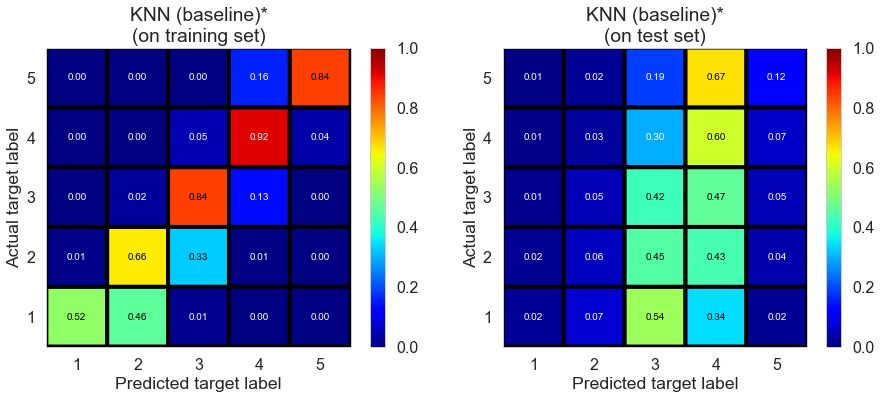


SVD-ALS1
Fitting time: 23.349732875823975 s.
RMSE on training set: 0.6702096518194466.
RMSE on test set: 1.3157448581587405.
r2 on training set: 0.7809045214169787.
r2 on test set: 0.1765527788739063.
Classification accuracy on training set: 0.5873440285204992.
Classification accuracy on test set: 0.25191396281443673.


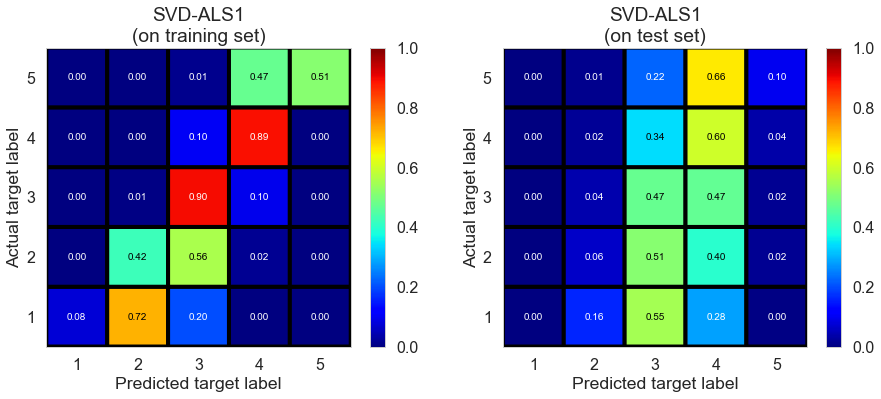


SVD-ALS2
Fitting time: 24.21618914604187 s.
RMSE on training set: 0.6711757005323667.
RMSE on test set: 1.318845055253253.
r2 on training set: 0.7802724521920915.
r2 on test set: 0.17266774566933607.
Classification accuracy on training set: 0.5806190244692918.
Classification accuracy on test set: 0.2426783327257261.


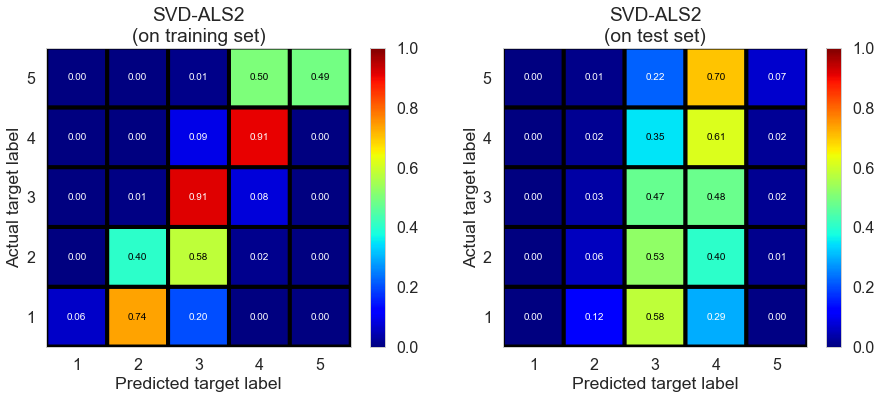


SVD-SGD*
Fitting time: 1.2642662525177002 s.
RMSE on training set: 0.8928952940156555.
RMSE on test set: 1.3236479696573273.
r2 on training set: 0.6111222211783245.
r2 on test set: 0.1666308857046952.
Classification accuracy on training set: 0.3676065467509318.
Classification accuracy on test set: 0.24753919066715274.


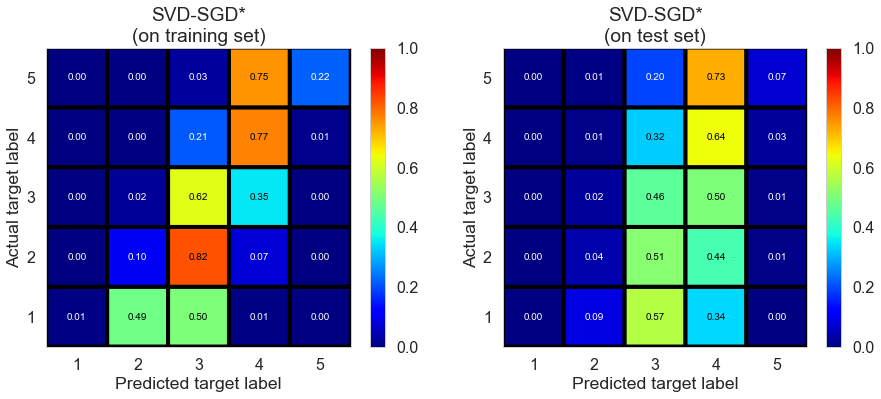


SVD++-SGD*
Fitting time: 3.6611101627349854 s.
RMSE on training set: 0.9284792085999043.
RMSE on test set: 1.3269543581257106.
r2 on training set: 0.5795092704013157.
r2 on test set: 0.16246227962188042.
Classification accuracy on training set: 0.38073245827256524.
Classification accuracy on test set: 0.24668854052740308.


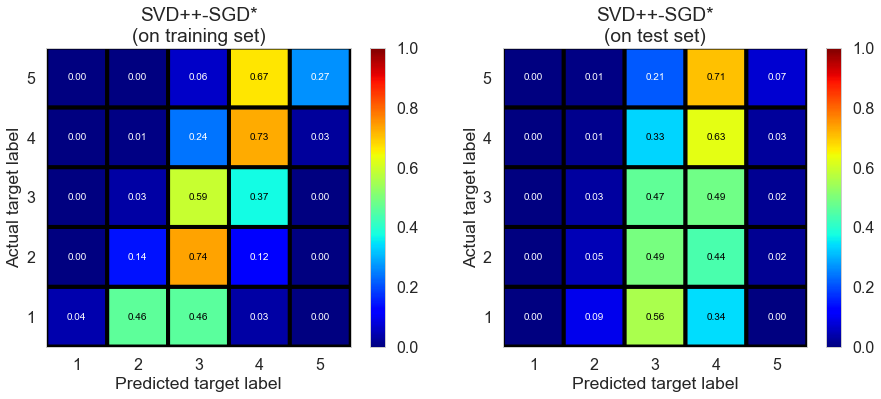


NMF-SGD*
Fitting time: 1.2862589359283447 s.
RMSE on training set: 0.24852910806723005.
RMSE on test set: 1.5249351848354615.
r2 on training set: 0.9698722581215242.
r2 on test set: -0.10610199418594357.
Classification accuracy on training set: 0.9367201426024956.
Classification accuracy on test set: 0.2592052497265767.


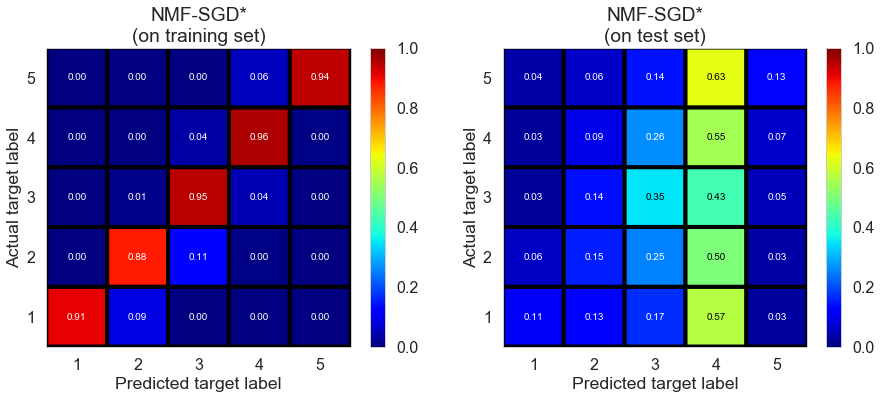


Slope one*
Fitting time: 0.3130006790161133 s.
RMSE on training set: 0.3544785676341744.
RMSE on test set: 1.5589400131853888.
r2 on training set: 0.9387096609652442.
r2 on test set: -0.15598237798076386.
Classification accuracy on training set: 0.8667963052989791.
Classification accuracy on test set: 0.27597520962449873.


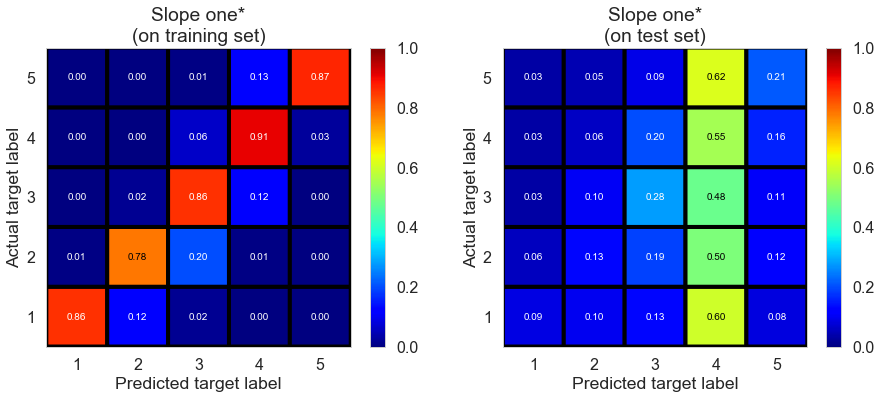


Co-clustering*
Fitting time: 1.3436543941497803 s.
RMSE on training set: 0.8066145714728923.
RMSE on test set: 1.483334292452556.
r2 on training set: 0.6826458470438427.
r2 on test set: -0.046575296620603224.
Classification accuracy on training set: 0.5943931291524874.
Classification accuracy on test set: 0.29505407704459835.


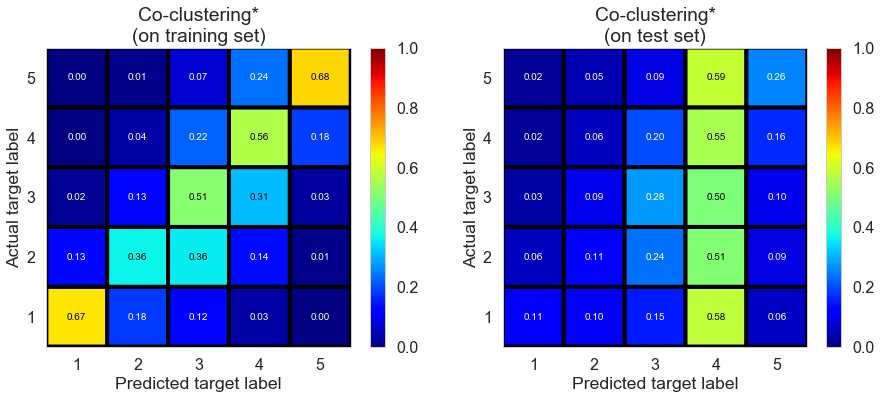


Wall time: 39.7 s


In [9]:
%%time

estimators = IO(data_dir + 'results/estimators.pkl').read_pickle()
is_successful = IO(data_dir + 'results/is_successful.pkl').read_pickle()

for i in range(len(estimators)):
    if is_successful[i]:
        print_results(estimators[i], model_names[i], X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test, \
                      figname=fignames[i])
        